# Import Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# Load Dataset

In [119]:
df = pd.read_csv('Titanic-Dataset.csv')

In [120]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S


In [121]:
df = df.iloc[:, 1:]
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
614,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
111,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
402,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
583,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
855,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Data Visualizations

### BoxPlot

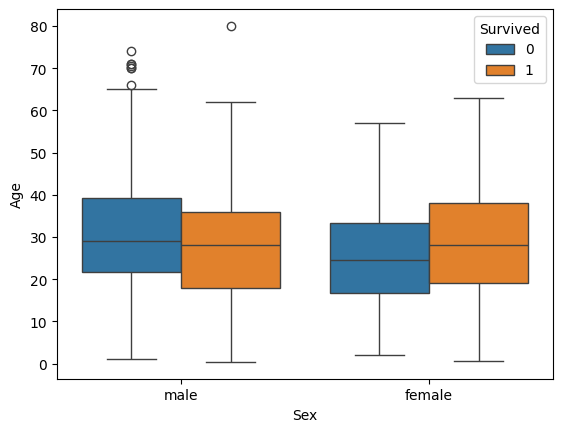

In [123]:
# This plot shows that females are more likely to survive specially of middle ages

sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.show()


### Distplot

C:\Users\PMLS\AppData\Local\Temp\ipykernel_41776\2648862117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'], hist=False)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_41776\2648862117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survi

<Axes: xlabel='Age', ylabel='Density'>

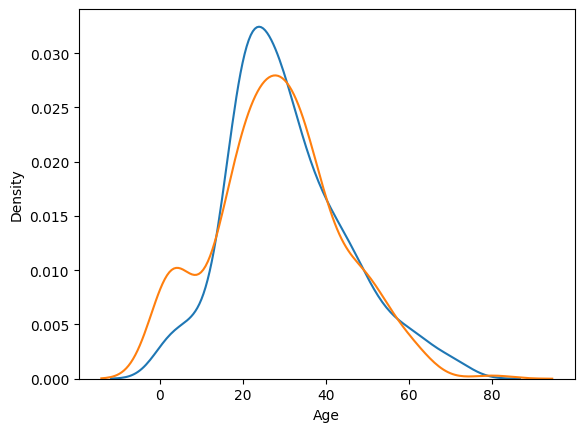

In [124]:
# This plot shows that less age people (children) are more likely to survive

sns.distplot(df[df['Survived']==0]['Age'], hist=False)
sns.distplot(df[df['Survived']==1]['Age'], hist=False)

### Heatmap

<Axes: xlabel='Survived', ylabel='Pclass'>

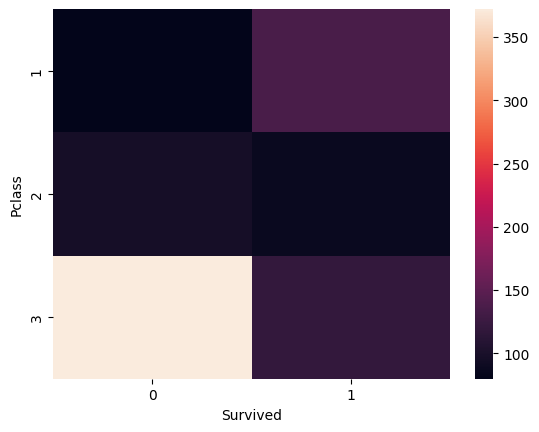

In [125]:
# Shows that people in upper class are more likely to survive

sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']))

### Pairplot - relation between all (Numerical) features

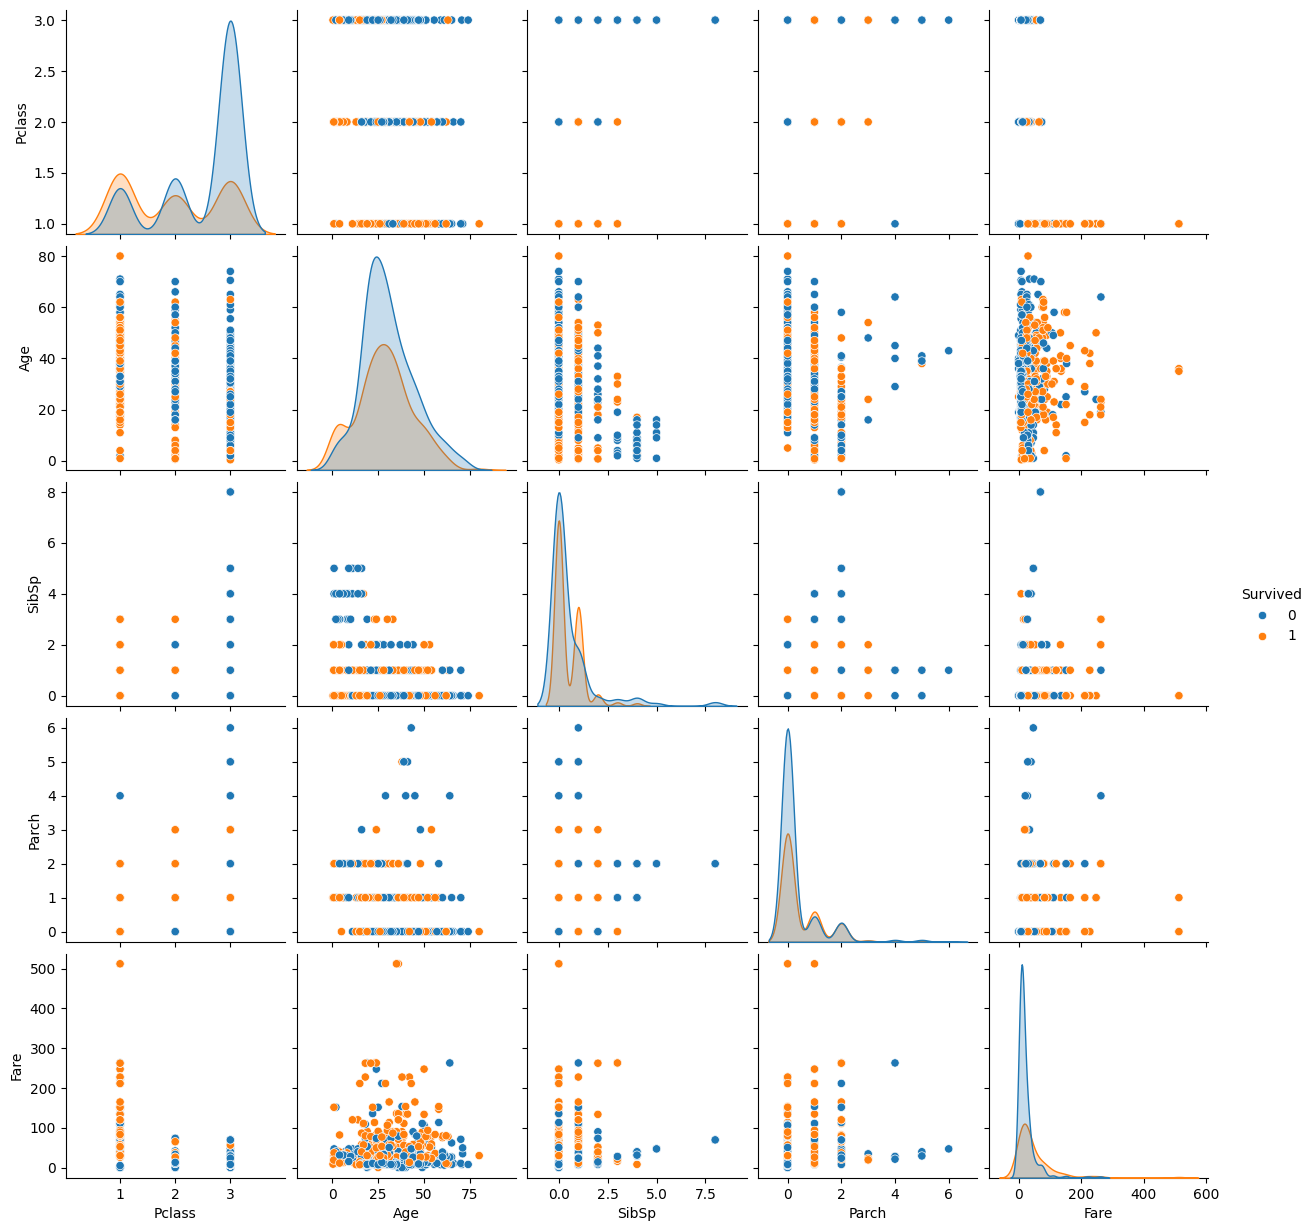

In [126]:
sns.pairplot(df, hue='Survived')

# Separate features and target

In [127]:
X = df.iloc[:, 1:]

In [128]:
X.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
858,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
124,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
528,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
847,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C


In [129]:
y = df.iloc[:, 0]

In [130]:
y.sample(5)

561    0
93     0
323    1
771    0
606    0
Name: Survived, dtype: int64

### New Feature construction

In [131]:
X["Family"] = X['SibSp'] + X['Parch'] + 1

In [132]:
X.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
838,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,1
487,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,1
252,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,1
454,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S,1
287,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,1


### Drop useless features

In [133]:
X.drop(['SibSp', 'Parch', 'Cabin', 'Ticket', 'Name'], axis = 1, inplace = True)

In [134]:
# Convert 'Sex' to numerical values
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [135]:
X.sample(5)

,Pclass,Sex,Age,Fare,Embarked,Family
123,2,1,32.5,13.0000,2.0,1
440,2,1,45.0,26.2500,2.0,3
128,3,1,NaN,22.3583,0.0,3
782,1,0,29.0,30.0000,2.0,1
242,2,0,29.0,10.5000,2.0,1


# Train Test Split

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


# Handling Missing Data 

### Age Column (Using Random Imputation)

In [138]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [139]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\PMLS\AppData\Local\Temp\ipykernel_41776\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

In [140]:
X_train.drop(['Age'], axis = 1, inplace = True)
X_test.drop(['Age'], axis = 1, inplace = True)

### Embarked Column (Using Most Frequent Imputation)

In [141]:
imputer = SimpleImputer(strategy='most_frequent')

X_train['Embarked'] = imputer.fit_transform(X_train[['Embarked']]).ravel()

X_test['Embarked'] = imputer.transform(X_test[['Embarked']]).ravel()


In [142]:
X_train.sample(5)

,Pclass,Sex,Fare,Embarked,Family,Age_imputed
609,1,1,153.4625,2.0,1,40.0
781,1,1,57.0000,2.0,2,17.0
85,3,1,15.8500,2.0,4,33.0
436,3,1,34.3750,2.0,5,21.0
792,3,1,69.5500,2.0,11,27.0


# Fit models and evaluate 

                    Model  Accuracy
0     Logistic Regression  0.798883
1           Decision Tree  0.770950
2           Random Forest  0.849162
3       Gradient Boosting  0.798883
4  Support Vector Machine  0.659218
5     K-Nearest Neighbors  0.675978


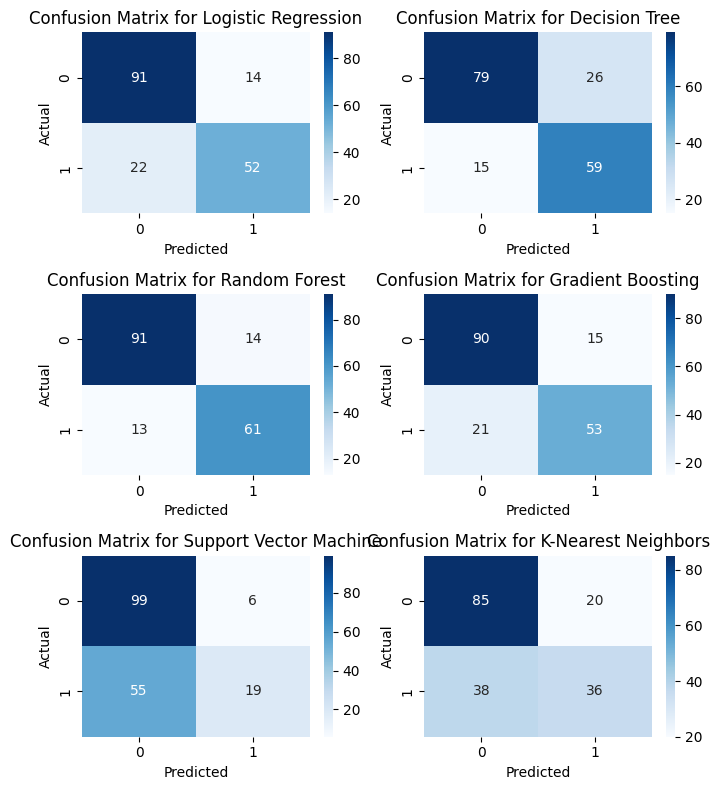

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}


results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)


# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Model Improvement

### Check for Skewness of columns

C:\Users\PMLS\AppData\Local\Temp\ipykernel_41776\1281908091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

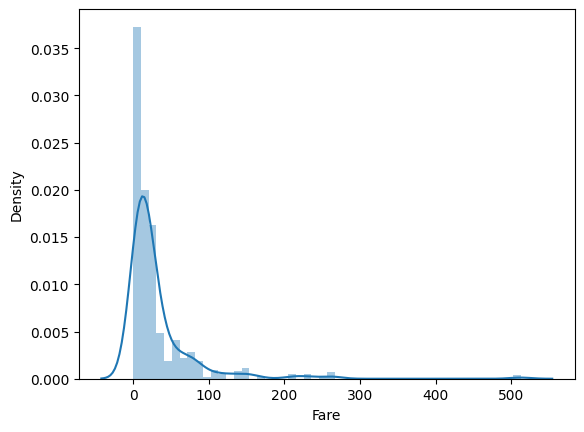

In [144]:
sns.distplot(X_train['Fare'])

((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

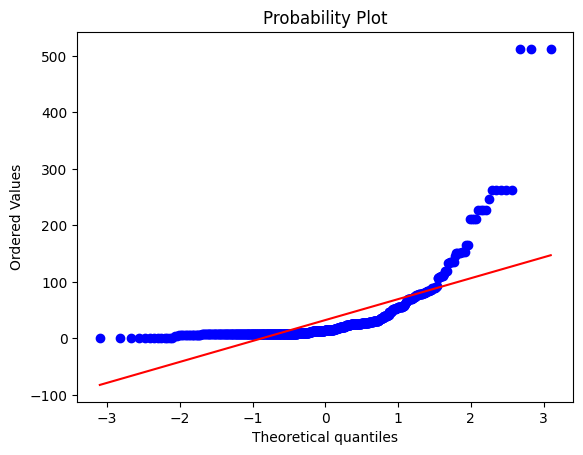

In [145]:
stats.probplot(X_train['Fare'], plot = plt)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_41776\909881866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'])


<Axes: xlabel='Age_imputed', ylabel='Density'>

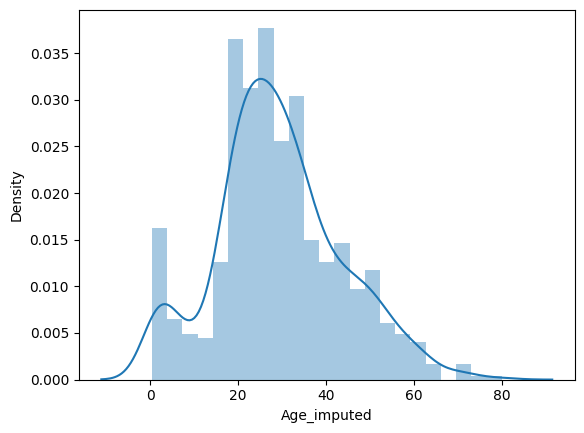

In [146]:
sns.distplot(X_train['Age_imputed'])

((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

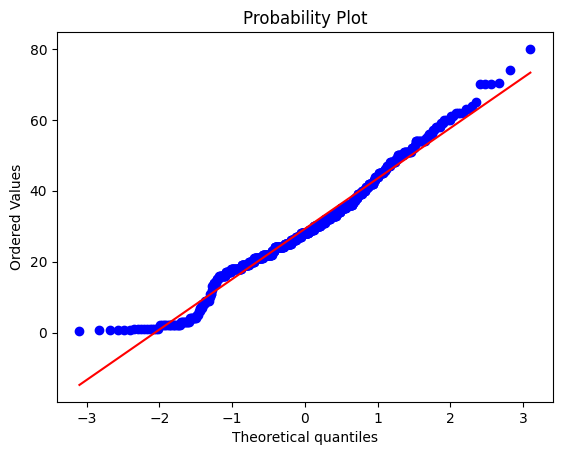

In [147]:
stats.probplot(X_train['Age_imputed'], plot = plt)

### We can Normalize skewed data of 'Fare Column' to get better results

In [148]:
# By default, PowerTransformer uses Yeo-Johnson transform

pt = PowerTransformer()
X_train_sc_fare = pt.fit_transform(X_train[['Fare']])
X_test_sc_fare = pt.transform(X_test[['Fare']])


C:\Users\PMLS\AppData\Local\Temp\ipykernel_41776\2829081328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_sc_fare)


<Axes: ylabel='Density'>

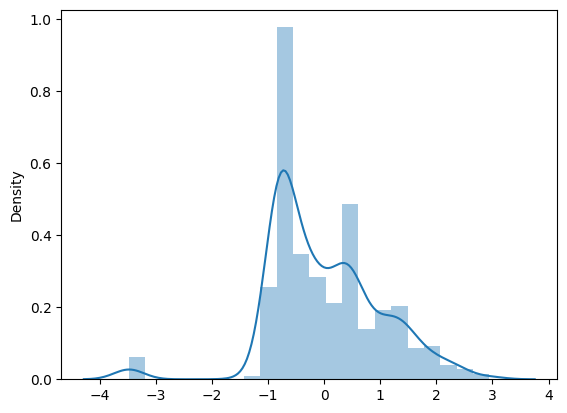

In [149]:
sns.distplot(X_train_sc_fare)

In [150]:
X_train['Fare'] = X_train_sc_fare
X_test['Fare'] = X_test_sc_fare

In [151]:
X_train

,Pclass,Sex,Fare,Embarked,Family,Age_imputed
331,1,0,0.479998,2.0,1,45.5
733,2,0,-0.283753,2.0,1,23.0
382,3,0,-0.772447,2.0,1,32.0
704,3,0,-0.781285,2.0,2,26.0
813,3,1,0.568460,2.0,7,6.0
...,...,...,...,...,...,...
106,3,1,-0.807217,2.0,1,21.0
270,1,0,0.560073,2.0,1,17.0
860,3,0,-0.203135,2.0,3,41.0
435,1,1,1.783869,2.0,4,14.0


((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

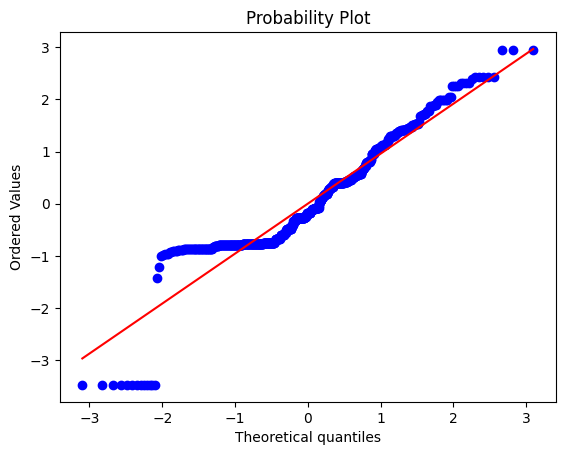

In [152]:
stats.probplot(X_train['Fare'], plot = plt)

# Data is now more normally distributed

### Fit models again

                    Model  Accuracy
0     Logistic Regression  0.804469
1           Decision Tree  0.765363
2           Random Forest  0.849162
3       Gradient Boosting  0.798883
4  Support Vector Machine  0.620112
5     K-Nearest Neighbors  0.743017


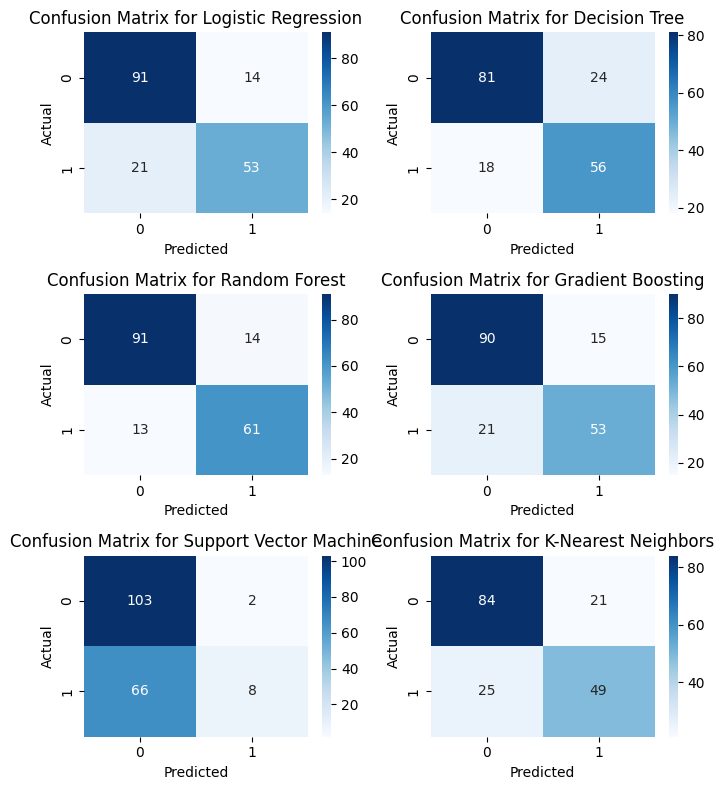

In [153]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}


results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)


# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Standardizing Data

In [154]:
sc = StandardScaler()
X_train['Age_imputed'] = sc.fit_transform(X_train[['Age_imputed']])
X_test['Age_imputed'] = sc.transform(X_test[['Age_imputed']])
X_train['Fare'] = sc.fit_transform(X_train[['Fare']])
X_test['Fare'] = sc.transform(X_test[['Fare']])

In [155]:
X_train

,Pclass,Sex,Fare,Embarked,Family,Age_imputed
331,1,0,0.479998,2.0,1,1.135003
733,2,0,-0.283753,2.0,1,-0.439001
382,3,0,-0.772447,2.0,1,0.190601
704,3,0,-0.781285,2.0,2,-0.229133
813,3,1,0.568460,2.0,7,-1.628248
...,...,...,...,...,...,...
106,3,1,-0.807217,2.0,1,-0.578912
270,1,0,0.560073,2.0,1,-0.858735
860,3,0,-0.203135,2.0,3,0.820202
435,1,1,1.783869,2.0,4,-1.068602


### Fit Models again

                    Model  Accuracy
0     Logistic Regression  0.804469
1           Decision Tree  0.776536
2           Random Forest  0.849162
3       Gradient Boosting  0.798883
4  Support Vector Machine  0.815642
5     K-Nearest Neighbors  0.832402


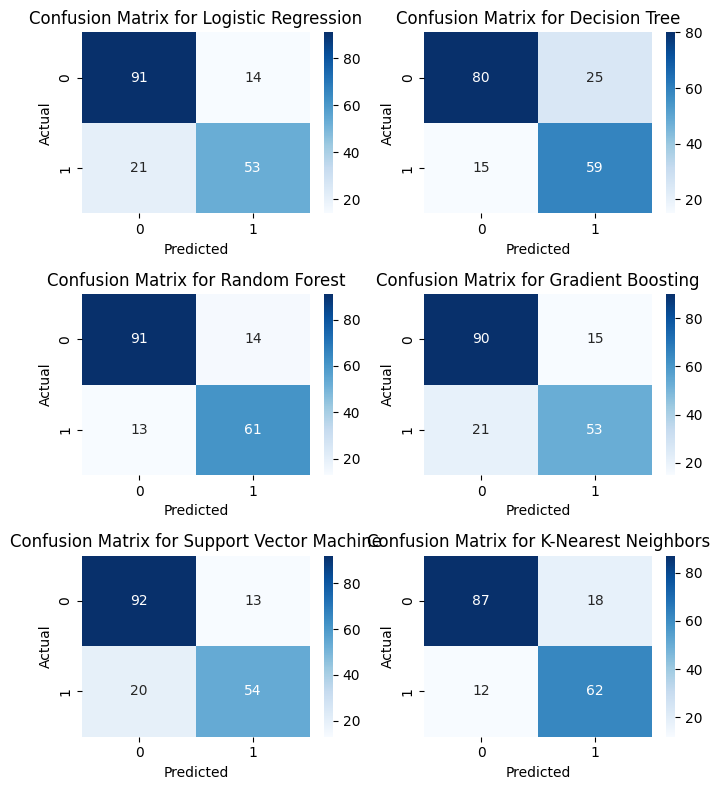

In [156]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}


results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)


# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Conclusion
### The accuracy turns out to be ~83-85% . Normalizing the data didn't made much difference in this case. Performing EDA, the data is now more normally distributed. 
### For further improvement in the model, we can try making some other features using the same columns like making a feature using age bins, or splitting family column into large and small families (which had no significant effect on the results)